In [3]:
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

!gdown --id 1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx

df = pd.read_csv('Synthetic_Financial_Datasets_For_Fraud_Detection.csv')


print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx
From (redirected): https://drive.google.com/uc?id=1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx&confirm=t&uuid=cb0b9fbf-80e8-460e-a3b1-4ad99f187841
To: /content/Synthetic_Financial_Datasets_For_Fraud_Detection.csv
100% 494M/494M [00:11<00:00, 42.9MB/s]
Dataset Shape: (6362620, 11)

First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  116

In [5]:

!pip install pandas numpy matplotlib seaborn imbalanced-learn scikit-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive', force_remount=True)


!gdown --id 1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx

# Load the dataset
df = pd.read_csv('Synthetic_Financial_Datasets_For_Fraud_Detection.csv')

# Display dataset information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

# Step 1: Data Preprocessing
print("\nDistribution of the target variable 'isFraud':")
print(df['isFraud'].value_counts())

X = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

X = pd.get_dummies(X, columns=['type'], drop_first=True)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
print("\nDistribution of the target variable after SMOTE:")
print(y_balanced.value_counts())

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_balanced)
X_scaled = pd.DataFrame(X_scaled, columns=X_balanced.columns)
print("\nFirst 5 rows of the preprocessed dataset:")
print(X_scaled.head())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_balanced, test_size=0.25, random_state=42)
print("\nShapes of the training and testing sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Step 2: Model Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10]
}


rf_model = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(rf_model, params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

print("\nBest Hyperparameters from GridSearchCV:")
print(grid_search.best_params_)

# Step 3: Model Evaluation
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

def evaluate_fraud_detection(model, X_test, y_test):
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, predictions, average='binary'
    )

    metrics = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc_score(y_test, probs)
    }

    return metrics

evaluation_metrics = evaluate_fraud_detection(best_rf_model, X_test, y_test)

print("\nEvaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")

accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f"\nAccuracy of the model: {accuracy:.4f}")

Mounted at /content/drive
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx
From (redirected): https://drive.google.com/uc?id=1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx&confirm=t&uuid=93fc31de-7b3e-4783-8e28-b551b1204834
To: /content/Synthetic_Financial_Datasets_For_Fraud_Detection.csv
100% 494M/494M [00:10<00:00, 45.8MB/s]
Dataset Shape: (6362620, 11)

First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00

KeyboardInterrupt: 

Mounted at /content/drive
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx
From (redirected): https://drive.google.com/uc?id=1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx&confirm=t&uuid=45642ea4-be9a-41dd-9c5b-cbb666ba5f39
To: /content/Synthetic_Financial_Datasets_For_Fraud_Detection.csv
100% 494M/494M [00:06<00:00, 79.4MB/s]


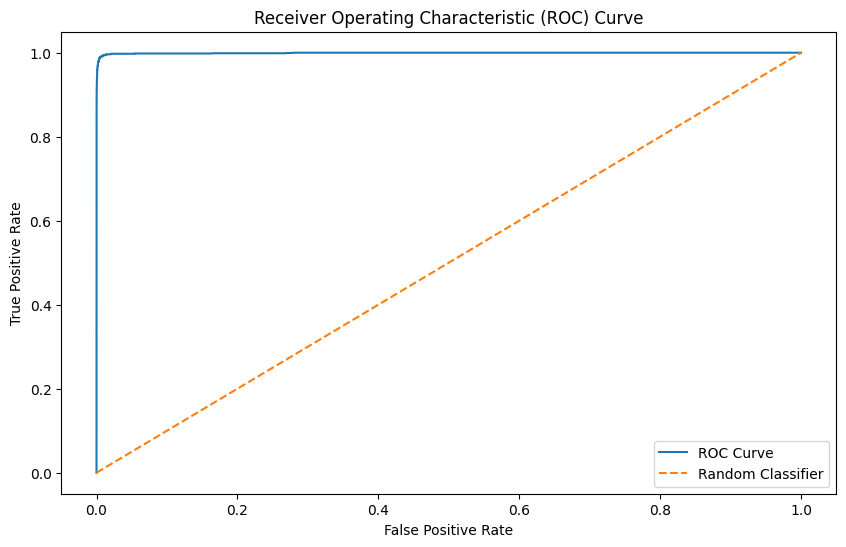

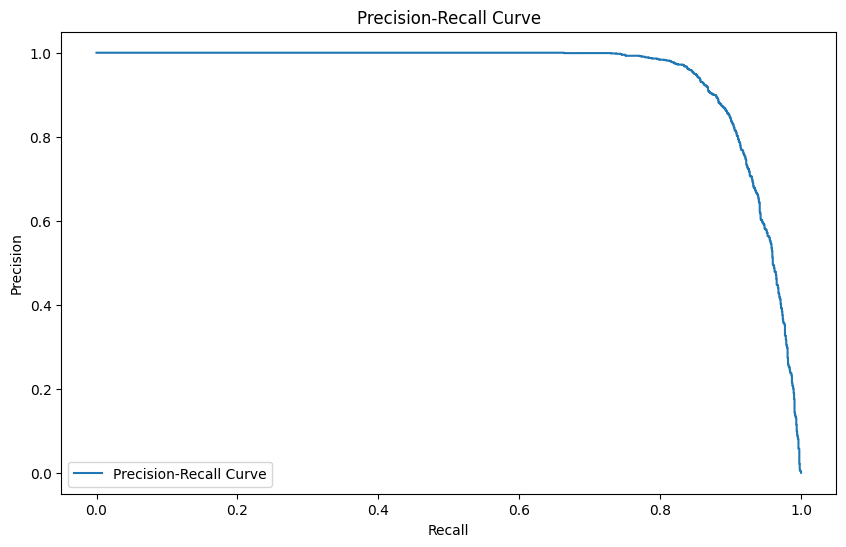

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270904
           1       0.17      0.99      0.29      1620

    accuracy                           0.99   1272524
   macro avg       0.58      0.99      0.64   1272524
weighted avg       1.00      0.99      1.00   1272524


ROC-AUC Score: 0.9993199722402322


In [8]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Download the dataset
!gdown --id 1Yullk2DNztuZNyvtlrMIDqUpgSrNv7kx


df = pd.read_csv('Synthetic_Financial_Datasets_For_Fraud_Detection.csv')



df = pd.read_csv('Synthetic_Financial_Datasets_For_Fraud_Detection.csv')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

class FraudDetectionModel:
    def __init__(self):
        self.model = None
        self.preprocessor = None
        self.random_state = 42

    def load_data(self, filepath):
        """
        Load synthetic financial dataset

        Args:
            filepath (str): Path to the CSV file

        Returns:
            pandas.DataFrame: Loaded dataset
        """
        try:
            df = pd.read_csv(filepath)
            return df
        except FileNotFoundError:
            print(f"Error: File not found at {filepath}")
            return None

    def preprocess_data(self, df):
        """
        Preprocess the dataset

        Args:
            df (pandas.DataFrame): Input dataframe

        Returns:
            tuple: Processed features and target variable
        """
        df = df.drop(['nameOrig', 'nameDest'], axis=1, errors='ignore')

        numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        numeric_features = [col for col in numeric_features if col not in ['isFraud', 'isFlaggedFraud']]
        categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numeric_features),
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
            ])

        X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
        y = df['isFraud']

        return X, y, preprocessor

    def handle_class_imbalance(self, X, y):
        """
        Apply SMOTE to handle class imbalance

        Args:
            X (numpy.array): Features
            y (numpy.array): Target variable

        Returns:
            tuple: Resampled features and target
        """
        smote = SMOTE(random_state=self.random_state)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        return X_resampled, y_resampled

    def create_model(self):
        """
        Create Random Forest model with optimal parameters

        Returns:
            RandomForestClassifier: Configured model
        """
        return RandomForestClassifier(
            n_estimators=100,
            max_depth=15,
            min_samples_split=5,
            random_state=self.random_state,
            class_weight='balanced'
        )

    def train_model(self, X_train, y_train):
        """
        Train the fraud detection model

        Args:
            X_train (numpy.array): Training features
            y_train (numpy.array): Training target

        Returns:
            RandomForestClassifier: Trained model
        """
        model = self.create_model()
        model.fit(X_train, y_train)
        return model

    def evaluate_model(self, model, X_test, y_test):
        """
        Evaluate model performance

        Args:
            model (RandomForestClassifier): Trained model
            X_test (numpy.array): Test features
            y_test (numpy.array): Test target

        Returns:
            dict: Performance metrics
        """
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        metrics = {
            'classification_report': classification_report(y_test, y_pred),
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, y_prob),
            'avg_precision': average_precision_score(y_test, y_prob)
        }

        return metrics

    def plot_roc_curve(self, y_test, y_prob):
        """
        Plot ROC curve

        Args:
            y_test (numpy.array): True labels
            y_prob (numpy.array): Predicted probabilities
        """
        from sklearn.metrics import roc_curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(10, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

    def plot_precision_recall_curve(self, y_test, y_prob):
        """
        Plot Precision-Recall curve

        Args:
            y_test (numpy.array): True labels
            y_prob (numpy.array): Predicted probabilities
        """
        precision, recall, _ = precision_recall_curve(y_test, y_prob)

        plt.figure(figsize=(10, 6))
        plt.plot(recall, precision, label='Precision-Recall Curve')
        plt.title('Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        plt.show()

    def main_pipeline(self, filepath):
        """
        Main pipeline for fraud detection

        Args:
            filepath (str): Path to dataset

        Returns:
            dict: Model performance metrics
        """
        df = self.load_data(filepath)
        if df is None:
            return None

        X, y, preprocessor = self.preprocess_data(df)

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=self.random_state
        )

        X_train_transformed = preprocessor.fit_transform(X_train)
        X_test_transformed = preprocessor.transform(X_test)

        X_train_resampled, y_train_resampled = self.handle_class_imbalance(
            X_train_transformed, y_train
        )

        model = self.train_model(X_train_resampled, y_train_resampled)

        metrics = self.evaluate_model(model, X_test_transformed, y_test)

        y_prob = model.predict_proba(X_test_transformed)[:, 1]
        self.plot_roc_curve(y_test, y_prob)
        self.plot_precision_recall_curve(y_test, y_prob)

        return metrics

if __name__ == "__main__":
    fraud_detection = FraudDetectionModel()
    results = fraud_detection.main_pipeline('Synthetic_Financial_Datasets_For_Fraud_Detection.csv')

    if results:
        print("Classification Report:")
        print(results['classification_report'])
        print("\nROC-AUC Score:", results['roc_auc'])

In [ ]:
#Model Evaluation
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

def evaluate_fraud_detection(model, X_test, y_test):
    predictions = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test, predictions, average='binary'
    )

    metrics = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc_score(y_test, probs)
    }

    return metrics

evaluation_metrics = evaluate_fraud_detection(best_rf_model, X_test, y_test)

print("\nEvaluation Metrics:")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.4f}")


 print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nFeature Importance:")
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    print(feature_importance.head())

    return rf_model, accuracy_score(y_test, y_pred)

In [ ]:
# 2. Basic Analysis of Transaction Types and Fraud
def analyze_transaction_types(df):
    # Transaction type distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='type')
    plt.title('Distribution of Transaction Types')
    plt.xticks(rotation=45)
    plt.show()

    # Fraud distribution by transaction type
    fraud_by_type = df.groupby(['type', 'isFraud']).size().unstack()
    fraud_percentages = (fraud_by_type[1] / (fraud_by_type[0] + fraud_by_type[1]) * 100).round(2)
    print("\nFraud Percentage by Transaction Type:")
    print(fraud_percentages)

In [ ]:
def analyze_time_patterns(df):
    fraud_over_time = df.groupby(['step', 'isFraud']).size().unstack()
    fraud_rate = (fraud_over_time[1] / (fraud_over_time[0] + fraud_over_time[1]) * 100)

    plt.figure(figsize=(12, 4))
    plt.plot(fraud_rate.index, fraud_rate.values)
    plt.title('Fraud Rate Over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Fraud Rate (%)')
    plt.show()

In [ ]:
print("Running comprehensive fraud analysis...")
# Print summary statistics
print("\nFraud Summary Statistics:")
print(f"Total Transactions: {len(df):,}")
print(f"Total Fraudulent Transactions: {df['isFraud'].sum():,}")
print(f"Fraud Rate: {(df['isFraud'].mean() * 100):.2f}%")
print(f"\nAverage Transaction Amounts:")
print(f"Normal Transactions: ${df[df['isFraud'] == 0]['amount'].mean():,.2f}")
print(f"Fraudulent Transactions: ${df[df['isFraud'] == 1]['amount'].mean():,.2f}")

Running comprehensive fraud analysis...

Fraud Summary Statistics:
Total Transactions: 6,362,620
Total Fraudulent Transactions: 8,213
Fraud Rate: 0.13%

Average Transaction Amounts:
Normal Transactions: $178,197.04
Fraudulent Transactions: $1,467,967.30


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE


def preprocess_data(df):
    df_processed = pd.get_dummies(df, columns=['type'])
    features = df_processed.drop(['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], axis=1)
    target = df_processed['isFraud']
    return features, target

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_balanced, y_train_balanced)

    return rf_model, X_test_scaled, y_test

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("\nROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

df = pd.read_csv('Synthetic_Financial_Datasets_For_Fraud_Detection.csv')
X, y = preprocess_data(df)
model, X_test, y_test = train_model(X, y)
evaluate_model(model, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.63      0.97      0.77      1620

    accuracy                           1.00   1272524
   macro avg       0.82      0.98      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524


ROC-AUC Score: 0.9986536976926234
